In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

In [25]:
def gaussian_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def generate_random_gaussian_data(mu, sigma, size):
    return np.random.normal(mu, sigma, size)
#'''
num_bins=50
mu = 1
sigma = 2 #4 #2
size = 100 #100000
data = generate_random_gaussian_data(mu, sigma, size)
min_x = min(data)
max_x = max(data)
x_range = np.linspace(min_x, max_x, num_bins)
pdf_values = gaussian_pdf(x_range, mu, sigma)
print('xrange:')
print(x_range)

hist, bin_edges = np.histogram(data, bins=num_bins, density=True)
#plot_binned_likelihood(mu, sigma, data)
#'''

xrange:
[-3.13177427 -2.94085562 -2.74993698 -2.55901833 -2.36809968 -2.17718104
 -1.98626239 -1.79534374 -1.6044251  -1.41350645 -1.2225878  -1.03166916
 -0.84075051 -0.64983186 -0.45891322 -0.26799457 -0.07707592  0.11384272
  0.30476137  0.49568002  0.68659866  0.87751731  1.06843596  1.2593546
  1.45027325  1.6411919   1.83211054  2.02302919  2.21394784  2.40486648
  2.59578513  2.78670378  2.97762242  3.16854107  3.35945972  3.55037836
  3.74129701  3.93221566  4.1231343   4.31405295  4.5049716   4.69589024
  4.88680889  5.07772754  5.26864618  5.45956483  5.65048348  5.84140212
  6.03232077  6.22323942]


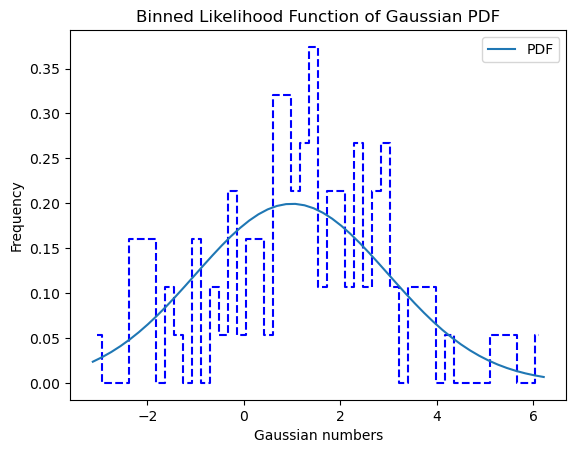

In [26]:
bincentres = [(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)]
plt.step(bincentres,hist,where='mid',color='b',linestyle='--')


#plt.hist(hist, histtype='step',stacked=True, fill=False, bins=bin_edges, alpha=0.3)
#plt.hist(x_range, histtype='step',stacked=True, fill=False, bins=bin_edges, alpha=0.3)
#plt.plot(x_range, pdf_values, label='PDF')
plt.plot(x_range, pdf_values, label='PDF')
plt.xlabel('Gaussian numbers')
#plt.ylabel('Likelihood')
plt.ylabel('Frequency')
plt.title('Binned Likelihood Function of Gaussian PDF')
plt.legend()

plt.show()

In [27]:
def calculate_chi_square(observed, expected):
    chi_square = np.sum((observed - expected) ** 2 / expected)
    return chi_square

# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate expected values using the Gaussian PDF
expected = gaussian_pdf(bin_centers, mu, sigma) * (bin_edges[1] - bin_edges[0]) * size

# Calculate observed counts (not normalized)
observed_counts = hist * size

# Calculate chi-square value and error
chi_square = calculate_chi_square(observed_counts, expected)
print('Chi-square value:', chi_square)

Chi-square value: 3489.679172961911


In [28]:
sigma_array = [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
chi_square_array = []
for sigma_guess in sigma_array:
    expected = gaussian_pdf(bin_centers, mu, sigma_guess) * (bin_edges[1] - bin_edges[0]) * size
    chi_square = calculate_chi_square(observed_counts, expected)
    chi_square_array.append(chi_square)
    print (sigma_guess, chi_square)

1.5 6909.4286521517115
1.75 4050.689100931981
2 3489.679172961911
2.25 3437.5346142790677
2.5 3564.016383294352
2.75 3772.077382399798
3 4024.0936291564076


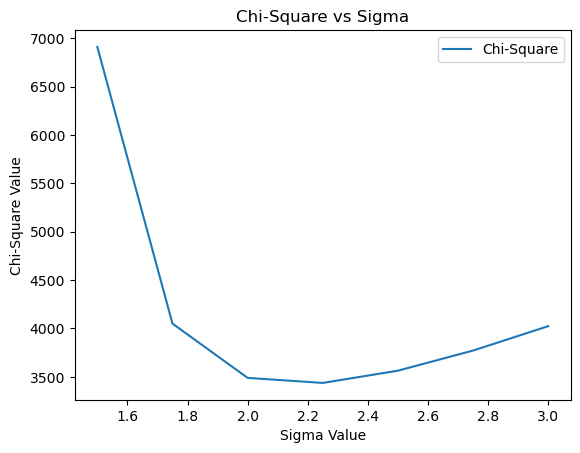

In [29]:
plt.plot(sigma_array, chi_square_array, label='Chi-Square')
plt.xlabel('Sigma Value')
#plt.ylabel('Likelihood')
plt.ylabel('Chi-Square Value')
plt.title('Chi-Square vs Sigma')
plt.legend()

plt.show()

In [30]:
sigma_array = np.linspace(1.8, 2.3, 100)
chi_square_array = []
for sigma_guess in sigma_array:
    expected = gaussian_pdf(bin_centers, mu, sigma_guess) * (bin_edges[1] - bin_edges[0]) * size
    chi_square = calculate_chi_square(observed_counts, expected)
    chi_square_array.append(chi_square)

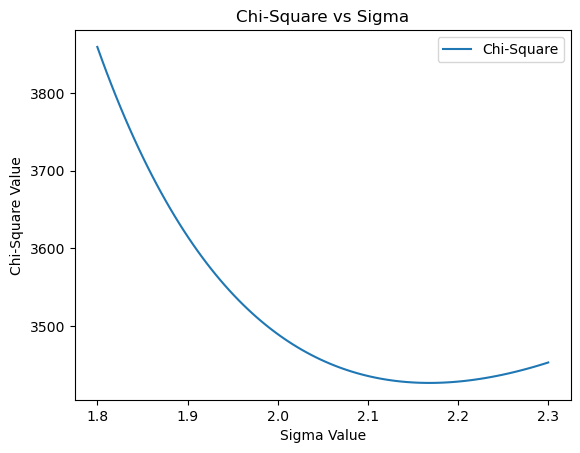

In [31]:
plt.plot(sigma_array, chi_square_array, label='Chi-Square')
plt.xlabel('Sigma Value')
#plt.ylabel('Likelihood')
plt.ylabel('Chi-Square Value')
plt.title('Chi-Square vs Sigma')
plt.legend()

plt.show()

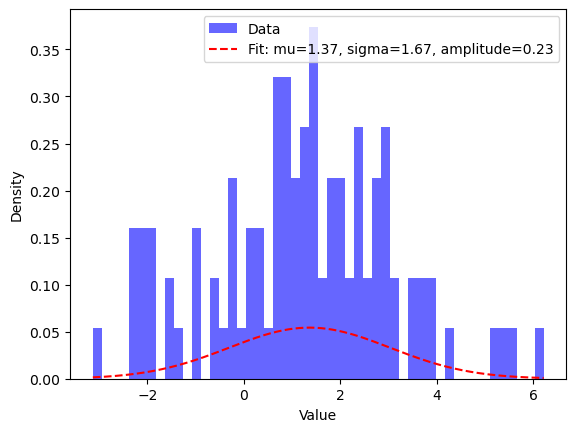

In [33]:
from scipy.optimize import curve_fit # Now use scipy to fit data

def fit_gaussian(x, y):
    def gaussian(x, mu, sigma, amplitude):
        return amplitude * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    
    popt, pcov = curve_fit(gaussian, x, y, p0=[np.mean(x), np.std(x), max(y)])
    return popt, np.sqrt(np.diag(pcov))

# Fit Gaussian to histogram data
popt, perr = fit_gaussian(bin_centers, hist)

# Plot the data and the fit
plt.hist(data, bins=num_bins, density=True, alpha=0.6, color='b', label='Data')
x_fit = np.linspace(min_x, max_x, 1000)
y_fit = gaussian_pdf(x_fit, popt[0], popt[1]) * popt[2]
plt.plot(x_fit, y_fit, 'r--', label=f'Fit: mu={popt[0]:.2f}, sigma={popt[1]:.2f}, amplitude={popt[2]:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Plot 3D surface of chi-square, mu, and sigma.